# process all turtle XML files

In [1]:
import pandas as pd
import glob
import os
from bs4 import BeautifulSoup as b
from pyproj import Proj 
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Step 1 load xif data from jason file

![title]("img/picture.png")

In [2]:
surveys = pd.read_json(r"\\oa-osm-01-per.it.csiro.au\OSM_PER_OA_NINGALOO_scratch\drone4\images_renamed.json")

In [3]:
surveys.GPSLongitude.head(5).str.split(' ',expand=True)


def get_longitude(item):
    longitude =float(item[0]) + float(item[2][0:-1])/60 + float(item[3][0:-1])/3600
    return (longitude)
surveys['longitude'] = pd.np.NAN
surveys['latitude'] = pd.np.NAN
surveys.loc[ ~surveys['GPSLongitude'].isna(),'longitude']=surveys.loc[ ~surveys['GPSLongitude'].isna(),'GPSLongitude'].str.split(' ',expand=True).apply(get_longitude,axis=1)
surveys.loc[ ~surveys['GPSLatitude'].isna(),'latitude']=surveys.loc[ ~surveys['GPSLatitude'].isna(),'GPSLatitude'].str.split(' ',expand=True).apply(get_longitude,axis=1)*-1
surveys =surveys[~surveys.longitude.isna()]

In [4]:
myProj = Proj("+proj=utm +zone=49K, +south +ellps=WGS84 +datum=WGS84 +units=m +no_defs")
surveys['easting'], surveys['northing'] = myProj(surveys['longitude'].values, surveys['latitude'].values)

In [5]:
%matplotlib notebook
# neds only 
#mask = (surveys.latitude>-21.964) & (surveys.latitude<-21.954)
#surveys = pd.DataFrame(surveys.loc[mask])
surveys['BaseName']=surveys.SourceFile.apply(os.path.basename)
surveys = surveys.loc[surveys['BaseName'].str.startswith('DRN')].copy()
surveys['BaseName']=surveys['BaseName'].str[0:-4]
surveys['DateTimeOriginal']=pd.to_datetime(surveys.DateTimeOriginal,format='%Y:%m:%d %H:%M:%S')
surveys['area']=surveys['BaseName'].str.split('_',expand=True)[0]

In [6]:
surveys['dt']=abs(surveys['DateTimeOriginal'].diff().dt.total_seconds())
surveys.loc[surveys['dt']<4,'dt'].mean()

2.4695945945945947

In [7]:
surveys['Survey'] =surveys['BaseName'].str.split('_',expand=True)[1]

In [8]:
surveys['BaseName'].str.split('_',expand=True)

0    1    2                3     4
0     DRN  001  MAN  20190430T080836  0001
1     DRN  001  MAN  20190430T081003  0002
2     DRN  001  MAN  20190430T081006  0003
3     DRN  001  MAN  20190430T081009  0004
4     DRN  001  MAN  20190430T081011  0005
5     DRN  001  MAN  20190430T081014  0006
6     DRN  001  MAN  20190430T081016  0007
7     DRN  001  MAN  20190430T081019  0008
8     DRN  001  MAN  20190430T081021  0009
9     DRN  001  MAN  20190430T081024  0010
10    DRN  001  MAN  20190430T081026  0011
11    DRN  001  MAN  20190430T081029  0012
12    DRN  001  MAN  20190430T081031  0013
13    DRN  001  MAN  20190430T081036  0014
14    DRN  001  MAN  20190430T081037  0015
15    DRN  001  MAN  20190430T081039  0016
16    DRN  001  MAN  20190430T081042  0017
17    DRN  001  MAN  20190430T081044  0018
18    DRN  001  MAN  20190430T081047  0019
19    DRN  001  MAN  20190430T081049  0020
20    DRN  001  MAN  20190430T081052  0021
21    DRN  001  MAN  20190430T081054  0022
22    DRN  001  MAN  20190430T081057  0023
23    DRN  001  MAN  20190430T081059  0024
24    DRN  001  MAN  20190430T081102  0025
25    DRN  001  MAN  20190430T081104  0026
26    DRN  001  MAN  20190430T081107  0027
27    DRN  001  MAN  20190430T081109  0028
28    DRN  001  MAN  20190430T081112  0029
29    DRN  001  MAN  20190430T081114  0030
30    DRN  001  MAN  20190430T081117  0031
31    DRN  001  MAN  20190430T081119  0032
32    DRN  001  MAN  20190430T081122  0033
33    DRN  001  MAN  20190430T081124  0034
34    DRN  001  MAN  20190430T081127  0035
35    DRN  001  MAN  20190430T081129  0036
36    DRN  001  MAN  20190430T081132  0037
37    DRN  001  MAN  20190430T081135  0038
38    DRN  001  MAN  20190430T081137  0039
39    DRN  001  MAN  20190430T081140  0040
40    DRN  001  MAN  20190430T081142  0041
41    DRN  001  MAN  20190430T081145  0042
42    DRN  001  MAN  20190430T081147  0043
43    DRN  001  MAN  20190430T081150  0044
44    DRN  001  MAN  20190430T081152  0045
45    DRN  001  MAN  20190430T081155  0046
46    DRN  001  MAN  20190430T081157  0047
47    DRN  001  MAN  20190430T081200  0048
48    DRN  001  MAN  20190430T081202  0049
49    DRN  001  MAN  20190430T081205  0050
50    DRN  001  MAN  20190430T081207  0051
51    DRN  001  MAN  20190430T081210  0052
52    DRN  001  MAN  20190430T081212  0053
53    DRN  001  MAN  20190430T081214  0054
54    DRN  001  MAN  20190430T081217  0055
55    DRN  001  MAN  20190430T081219  0056
56    DRN  001  MAN  20190430T081222  0057
57    DRN  001  MAN  20190430T081224  0058
58    DRN  001  MAN  20190430T081227  0059
59    DRN  001  MAN  20190430T081229  0060
60    DRN  001  MAN  20190430T081232  0061
61    DRN  001  MAN  20190430T081234  0062
62    DRN  001  MAN  20190430T081237  0063
63    DRN  001  MAN  20190430T081241  0064
64    DRN  001  MAN  20190430T081242  0065
65    DRN  001  MAN  20190430T081244  0066
66    DRN  001  MAN  20190430T081247  0067
67    DRN  001  MAN  20190430T081248  0068
68    DRN  001  MAN  20190430T081301  0069
69    DRN  001  MAN  20190430T081308  0070
70    DRN  001  MAN  20190430T081314  0071
71    DRN  001  MAN  20190430T081320  0072
72    DRN  001  MAN  20190430T081324  0073
73    DRN  001  MAN  20190430T081328  0074
74    DRN  001  MAN  20190430T081333  0075
75    DRN  001  MAN  20190430T081336  0076
76    DRN  001  MAN  20190430T081339  0077
77    DRN  001  MAN  20190430T081343  0078
78    DRN  001  MAN  20190430T081347  0079
79    DRN  001  MAN  20190430T081351  0080
80    DRN  001  MAN  20190430T081354  0081
81    DRN  001  MAN  20190430T081357  0082
82    DRN  001  MAN  20190430T081400  0083
83    DRN  001  MAN  20190430T081403  0084
84    DRN  001  MAN  20190430T081406  0085
85    DRN  001  MAN  20190430T081414  0086
86    DRN  001  MAN  20190430T081441  0087
87    DRN  001  MAN  20190430T081451  0088
88    DRN  001  MAN  20190430T081503  0089
89    DRN  001  MAN  20190430T081511  0090
90    DRN  001  MAN  20190430T081516  0091
91    DRN  001  MAN  20190430T081520  0092
92    DRN

In [10]:
files = glob.glob(r'Z:\*\DRN*.xml',recursive=True)
len(files)

420

In [11]:
turtles =pd.DataFrame(files,columns=['path'])
turtles['BaseName']=turtles.path.apply(os.path.basename)
turtles['BaseName']=turtles['BaseName'].str[0:-4]
turtles =turtles.merge(surveys,on=['BaseName'])
turtles

path                          BaseName          About  AbsoluteAltitude  AlreadyApplied  Aperture  ApertureValue  BitsPerSample  CalibratedFocalLength  CalibratedOpticalCenterX  CalibratedOpticalCenterY  CamReverse  CameraPitch  CameraRoll  CameraYaw CircleOfConfusion  ColorComponents ColorSpace Comment ComponentsConfiguration  CompressedBitsPerPixel       Compression Contrast           CreateDate CustomRendered    DateTimeOriginal  DependentImage1EntryNumber  DependentImage2EntryNumber DigitalZoomRatio Directory               EncodingProcess              ExifByteOrder  ExifImageHeight  ExifImageWidth  ExifToolVersion  ExifVersion  ExposureCompensation ExposureIndex ExposureMode ExposureProgram ExposureTime  FNumber       FOV             FileAccessDate             FileCreateDate             FileModifyDate                              FileName FilePermissions FileSize      FileSource FileType FileTypeExtension              Flash  \
0    Z:\007\DRN_007_NED_20190502T123733_0281.xml  DRN_007_NED_20190502T123733_0281  DJI Meta Data             43.21             0.0       4.5            4.5              8            3666.666504                    2432.0                    1824.0         0.0        -90.0         0.0      -89.1          0.011 mm                3       sRGB     NaN            -, Cr, Cb, Y                3.472213  JPEG (old-style)   Normal  2019:05:02 12:37:33         Normal 2019-05-02 12:37:33                         0.0                         0.0            undef     ./007  Baseline DCT, Huffman coding  Little-endian (Intel, II)           3648.0          4864.0            11.29        230.0                   0.0         undef         Auto      Program AE        1/120      4.5  73.7 deg  2019:05:20 10:23:16+08:00  2019:05:02 12:37:33+08:00  2019:05:02 12:37:33+08:00  DRN_007_NED_20190502T123733_0281.JPG       rw-rw-rw-   7.6 MB  Digital Camera     JPEG               jpg  No flash function   
1    Z:\007\DRN_007_NED_20190502T124816_0430.xml  DRN_007_NED_20190502T124816_0430  DJI Meta Data             47.78             0.0       4.0            4.0              8            3666.666504                    2432.0                    1824.0         0.0        -90.0         0.0       91.0          0.011 mm                3       sRGB     NaN            -, Cr, Cb, Y                3.495647  JPEG (old-style)   Normal  2019:05:02 12:48:16         Normal 2019-05-02 12:48:16                         0.0                         0.0            undef     ./007  Baseline DCT, Huffman coding  Little-endian (Intel, II)           3648.0          4864.0            11.29        230.0                   0.0         undef         Auto      Program AE        1/120      4.0  73.7 deg  2019:05:20 10:23:26+08:00  2019:05:02 12:48:16+08:00  2019:05:02 12:48:16+08:00  DRN_007_NED_20190502T124816_0430.JPG       rw-rw-rw-   7.7 MB  Digital Camera     JPEG               jpg  No flash function   
2    Z:\007\DRN_007_NED_20190502T125407_0564.xml  DRN_007_NED_20190502T125407_0564  DJI Meta Data             47.78             0.0       4.5            4.5              8            3666.666504                    2432.0                    1824.0         0.0        -90.0         0.0       91.0          0.011 mm                3       sRGB     NaN            -, Cr, Cb, Y                3.340724  JPEG (old-style)   Normal  2019:05:02 12:54:07         Normal 2019-05-02 12:54:07                         0.0                         0.0            undef     ./007  Baseline DCT, Huffman coding  Little-endian (Intel, II)           3648.0          4864.0            11.29        230.0                   0.0         undef         Auto      Program AE        1/160      4.5  73.7 deg  2019:05:20 10:23:36+08:00  2019:05:02 12:54:07+08:00  2019:05:02 12:54:07+08:00  DRN_007_NED_20190502T125407_0564.JPG       rw-rw-rw-   7.3 MB  Digital Camera     JPEG               jpg  No flash function   
3    Z:\007\DRN_007_NED_20190502T125725_0640.xml  DRN_007_NED_20190502T125725_0640  DJI 

<IPython.core.display.Javascript object>


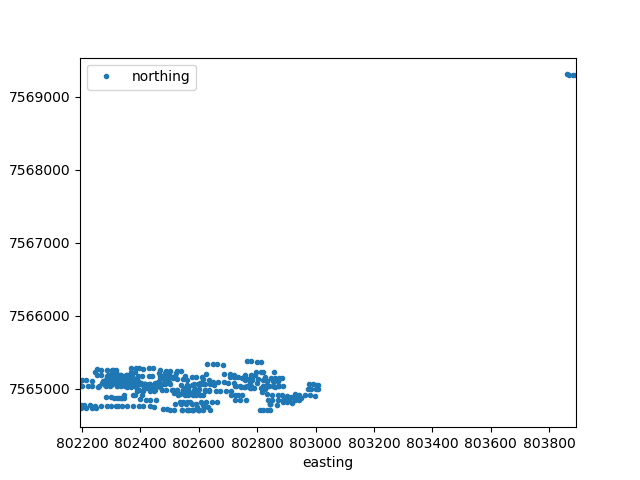

In [12]:
turtles.plot(x='easting',y='northing',marker ='.',linestyle='')

In [13]:

def get_turtle_xy(path):
    #print(path)
    with open(path, "r") as f: # opening xml file
        content = f.read()
    soup = b(content, "lxml")
    x = [];
    y = [];
    opath =[]
    objtype = []
    for obj in soup.findAll("object"):
        objtype.append(obj.find('name').text)
        opath.append(path) 
        x.append((int(obj.find('xmin').text) +int(obj.find('xmax').text))/2)
        y.append((int(obj.find('ymin').text) +int(obj.find('ymax').text))/2)
    return pd.DataFrame({'path':opath,'x':x,'y':y,'type':objtype})
output =list(turtles.path.apply(get_turtle_xy))
output =pd.concat(output)
output['BaseName']=output.path.apply(os.path.basename)
output['BaseName']=output['BaseName'].str[0:-4]

In [14]:
output =output.merge(turtles,on=['BaseName'])
output

path_x       x       y                  type                          BaseName                                       path_y          About  AbsoluteAltitude  AlreadyApplied  Aperture  ApertureValue  BitsPerSample  CalibratedFocalLength  CalibratedOpticalCenterX  CalibratedOpticalCenterY  CamReverse  CameraPitch  CameraRoll  CameraYaw CircleOfConfusion  ColorComponents ColorSpace Comment ComponentsConfiguration  CompressedBitsPerPixel       Compression Contrast           CreateDate CustomRendered    DateTimeOriginal  DependentImage1EntryNumber  DependentImage2EntryNumber DigitalZoomRatio Directory               EncodingProcess              ExifByteOrder  ExifImageHeight  ExifImageWidth  ExifToolVersion  ExifVersion  ExposureCompensation ExposureIndex ExposureMode ExposureProgram ExposureTime  FNumber       FOV             FileAccessDate             FileCreateDate             FileModifyDate                              FileName FilePermissions  \
0    Z:\007\DRN_007_NED_20190502T123733_0281.xml   417.5  1186.0                turtle  DRN_007_NED_20190502T123733_0281  Z:\007\DRN_007_NED_20190502T123733_0281.xml  DJI Meta Data             43.21             0.0       4.5            4.5              8            3666.666504                    2432.0                    1824.0         0.0        -90.0         0.0      -89.1          0.011 mm                3       sRGB     NaN            -, Cr, Cb, Y                3.472213  JPEG (old-style)   Normal  2019:05:02 12:37:33         Normal 2019-05-02 12:37:33                         0.0                         0.0            undef     ./007  Baseline DCT, Huffman coding  Little-endian (Intel, II)           3648.0          4864.0            11.29        230.0                   0.0         undef         Auto      Program AE        1/120      4.5  73.7 deg  2019:05:20 10:23:16+08:00  2019:05:02 12:37:33+08:00  2019:05:02 12:37:33+08:00  DRN_007_NED_20190502T123733_0281.JPG       rw-rw-rw-   
1    Z:\007\DRN_007_NED_20190502T124816_0430.xml  1464.5   834.0               turtle   DRN_007_NED_20190502T124816_0430  Z:\007\DRN_007_NED_20190502T124816_0430.xml  DJI Meta Data             47.78             0.0       4.0            4.0              8            3666.666504                    2432.0                    1824.0         0.0        -90.0         0.0       91.0          0.011 mm                3       sRGB     NaN            -, Cr, Cb, Y                3.495647  JPEG (old-style)   Normal  2019:05:02 12:48:16         Normal 2019-05-02 12:48:16                         0.0                         0.0            undef     ./007  Baseline DCT, Huffman coding  Little-endian (Intel, II)           3648.0          4864.0            11.29        230.0                   0.0         undef         Auto      Program AE        1/120      4.0  73.7 deg  2019:05:20 10:23:26+08:00  2019:05:02 12:48:16+08:00  2019:05:02 12:48:16+08:00  DRN_007_NED_20190502T124816_0430.JPG       rw-rw-rw-   
2    Z:\007\DRN_007_NED_20190502T125407_0564.xml   410.5   589.5               turtle   DRN_007_NED_20190502T125407_0564  Z:\007\DRN_007_NED_20190502T125407_0564.xml  DJI Meta Data             47.78             0.0       4.5            4.5              8            3666.666504                    2432.0                    1824.0         0.0        -90.0         0.0       91.0          0.011 mm                3       sRGB     NaN            -, Cr, Cb, Y                3.340724  JPEG (old-style)   Normal  2019:05:02 12:54:07         Normal 2019-05-02 12:54:07                         0.0                         0.0            undef     ./007  Baseline DCT, Huffman coding  Little-endian (Intel, II)           3648.0          4864.0            11.29        230.0                   0.0         undef         Auto      Program AE        1/160      4.5  73.7 deg  2019:05:20 10:23:36+08:00  2019:05:02 12:54:07+08:00  2019:05:02 12:54:07+08:00  DRN_007_NED_20190502T125407_0564.JPG       rw-rw-rw-   
3    Z:\007\DRN_007_NED_20190502T12572

In [15]:
output['rads']=np.deg2rad(output.FlightYawDegree)

In [16]:
output['dx']=((2432-output.x)/3666.666504)*output.RelativeAltitude
output['dy']=((1824-output.y)/3666.666504)*output.RelativeAltitude


In [17]:
    output['xx'] = output['dx'] * np.cos(output['rads']) +  output['dy'] * np.sin(output['rads'])
    output['xx'] =  output['easting'] + output['xx'] 
    output['yy'] = -output['dx'] * np.sin(output['rads']) + output['dy'] * np.cos(output['rads'])
    output['yy'] = output['northing'] + output['yy'] 

<IPython.core.display.Javascript object>


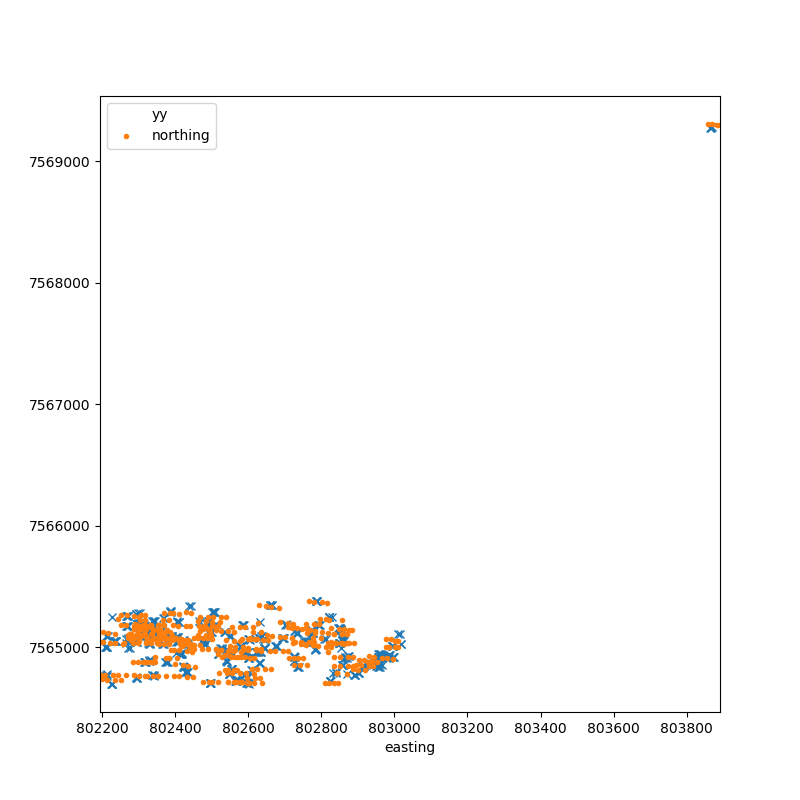

In [18]:
fig, ax = plt.subplots(figsize=(8,8))
output.plot(x='xx',y='yy',marker ='x',linestyle='',ax=ax)
turtles.plot(x='easting',y='northing',marker ='.',linestyle='',ax=ax)

In [41]:
from shapely.geometry import Point
from shapely.geometry import Polygon

def to_real_wrold(index,altitude,focallen):
    return (index/focallen)*altitude

def make_image_poly(item):
    xw =float(item.ImageWidth)/2
    yw=float(item.ImageHeight)/2
    x = to_real_wrold(np.array([xw,xw,-xw,-xw]),item.RelativeAltitude,item.CalibratedFocalLength)
    y = to_real_wrold(np.array([yw,-yw,-yw,yw]),item.RelativeAltitude,item.CalibratedFocalLength)
    rads = np.deg2rad(item.FlightYawDegree)
    if rads==0:
        xx = (x * np.cos(rads) +  y * np.sin(rads))+ item.easting 
        yy = (-x * np.sin(rads)  +  y  * np.cos(rads))+ item.northing
        return Polygon(zip(xx,yy))
    return None


surveys['Polygon'] = surveys.apply(make_image_poly,axis=1)

In [27]:
output['tcount']=output.groupby('BaseName')['x'].transform('count')

In [28]:
output['groups']=0
output.loc[abs(output.DateTimeOriginal.diff().dt.total_seconds())>12,'groups']=1
output['groups']=output['groups'].cumsum()
output['groups']

0        0
1        1
2        2
3        3
4        4
5        5
6        6
7        7
8        8
9        8
10       9
11      10
12      11
13      12
14      13
15      14
16      15
17      16
18      17
19      18
20      19
21      20
22      21
23      22
24      23
25      24
26      25
27      26
28      27
29      27
30      28
31      29
32      29
33      30
34      31
35      32
36      33
37      34
38      35
39      36
40      37
41      37
42      38
43      39
44      40
45      41
46      42
47      43
48      44
49      45
50      46
51      47
52      48
53      49
54      50
55      51
56      52
57      53
58      54
59      55
60      55
61      56
62      57
63      58
64      59
65      60
66      61
67      62
68      63
69      64
70      64
71      65
72      66
73      67
74      68
75      68
76      69
77      70
78      71
79      72
80      73
81      74
82      75
83      76
84      77
85      77
86      78
87      79
88      80
89      81
90      82

In [29]:
output['runlen']=output.groupby('groups')['x'].transform('count')

In [26]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

def plot_grp(grp):
    clustering = MeanShift(bandwidth=10).fit(np.dstack([grp.xx.values,grp.yy.values])[0])
    n_clusters_ = len(clustering.cluster_centers_)
#     fig,ax = plt.subplots(figsize=(8,8))
#     print('Estimated number of clusters: %d' % n_clusters_)
#     for index,row in grp.iterrows():
#         (x,y)=row.Polygon.exterior.xy
#         ax.plot(x, y, color='#6699cc', alpha=0.7,
#             linewidth=3, solid_capstyle='round', zorder=2)
#         ax.plot(row.xx,row.yy,marker ='x',linestyle='')
#     ax.set_aspect(1)
#     plt.scatter(clustering.cluster_centers_[:, 0], clustering.cluster_centers_[:, 1], c='red', s=50);
    return n_clusters_
    
tcounts =pd.DataFrame(output.groupby('groups').apply(plot_grp),columns=['turtle_count']).reset_index()
output1 =pd.merge(output,tcounts,on=['groups'])

KeyError: 'groups'

In [27]:
output1.groupby('groups').first()

NameError: name 'output1' is not defined

In [241]:
output1['survey']=output1.BaseName.str.split('_',expand=True)[1]

In [250]:
output1.DateTimeOriginal = pd.to_datetime(output1.DateTimeOriginal,format='%Y:%m:%d %H:%M:%S')

In [259]:
tcount =output1.groupby('groups').first().groupby('survey').sum()
survey=output1.groupby('survey').first()
pd.merge(output1.groupby('survey').first(),tcounts,on=['survey'])

KeyError: 'survey'

In [266]:
tuttle_summary =tcount.join(survey['DateTimeOriginal'])

In [299]:
im_count =surveys.groupby('Survey').count()
tuttle_summary.join(im_count['About']).to_csv('../summary.csv')

In [94]:
output['groups']=0
output.loc[abs(output.DateTimeOriginal.diff().dt.total_seconds())>12,'groups']=1
output['groups']=output['groups'].cumsum()
output['groups']

0       0
1       0
2       0
3       0
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      2
13      2
14      2
15      3
16      3
17      3
18      3
19      3
20      3
21      3
22      3
23      3
24      3
25      4
26      4
27      4
28      4
29      4
30      4
31      5
32      5
33      5
34      6
35      6
36      7
37      8
38      8
39      8
40      8
41      9
42      9
43      9
44      9
45      9
46     10
47     11
48     11
49     11
50     11
51     12
52     12
53     12
54     12
55     12
56     12
57     12
58     12
59     12
60     12
61     12
62     12
63     13
64     13
65     13
66     13
67     14
68     14
69     14
70     14
71     14
72     14
73     14
74     14
75     14
76     14
77     14
78     14
79     15
80     15
81     15
82     15
83     16
84     16
85     16
86     16
87     16
88     16
89     16
90     16
91     16
92     16
93     16
94     16
95     16
96     16
97     16
98     16
99     16


In [274]:

surveys.BaseName

0       DRN_001_MAN_20190430T080836_0001
1       DRN_001_MAN_20190430T081003_0002
2       DRN_001_MAN_20190430T081006_0003
3       DRN_001_MAN_20190430T081009_0004
4       DRN_001_MAN_20190430T081011_0005
5       DRN_001_MAN_20190430T081014_0006
6       DRN_001_MAN_20190430T081016_0007
7       DRN_001_MAN_20190430T081019_0008
8       DRN_001_MAN_20190430T081021_0009
9       DRN_001_MAN_20190430T081024_0010
10      DRN_001_MAN_20190430T081026_0011
11      DRN_001_MAN_20190430T081029_0012
12      DRN_001_MAN_20190430T081031_0013
13      DRN_001_MAN_20190430T081036_0014
14      DRN_001_MAN_20190430T081037_0015
15      DRN_001_MAN_20190430T081039_0016
16      DRN_001_MAN_20190430T081042_0017
17      DRN_001_MAN_20190430T081044_0018
18      DRN_001_MAN_20190430T081047_0019
19      DRN_001_MAN_20190430T081049_0020
20      DRN_001_MAN_20190430T081052_0021
21      DRN_001_MAN_20190430T081054_0022
22      DRN_001_MAN_20190430T081057_0023
23      DRN_001_MAN_20190430T081059_0024
24      DRN_001_

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=100).fit(g5)
centroids = kmeans.cluster_centers_
#print(centroids);
fig, ax = plt.subplots(figsize=(8,6))
plt.scatter(g5['xx'], g5['yy'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50);

In [300]:
surveys.po

path_x       x       y            type                          BaseName                                       path_y          About  AbsoluteAltitude  AlreadyApplied  Aperture  ApertureValue  BitsPerSample  CalibratedFocalLength  CalibratedOpticalCenterX  CalibratedOpticalCenterY  CamReverse  CameraPitch  CameraRoll  CameraYaw CircleOfConfusion  ColorComponents ColorSpace  Comment ComponentsConfiguration  CompressedBitsPerPixel       Compression Contrast           CreateDate CustomRendered    DateTimeOriginal  DependentImage1EntryNumber  DependentImage2EntryNumber DigitalZoomRatio Directory               EncodingProcess              ExifByteOrder  ExifImageHeight  ExifImageWidth  ExifToolVersion  ExifVersion  ExposureCompensation ExposureIndex ExposureMode ExposureProgram ExposureTime  FNumber       FOV             FileAccessDate             FileCreateDate             FileModifyDate                              FileName FilePermissions  \
survey                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
001     ..\001\DRN_001_MAN_20190430T081915_0161.xml  4427.5   301.5          turtle  DRN_001_MAN_20190430T081915_0161  ..\001\DRN_001_MAN_20190430T081915_0161.xml  DJI Meta Data             27.51             0.0       3.5            3.5              8            3666.666504                    2432.0                    1824.0         0.0        -90.0         0.0      -72.4          0.011 mm                3       sRGB      NaN            -, Cr, Cb, Y                3.444276  JPEG (old-style)   Normal  2019:04:30 08:19:15         Normal 2019-04-30 08:19:15                         0.0                         0.0            undef     ./001  Baseline DCT, Huffman coding  Little-endian (Intel, II)           3648.0          4864.0            11.29        230.0                   0.0         undef         Auto      Program AE         1/60      3.5  73.7 deg  2019:05:20 13:50:11+08:00  2019:04:30 08:19:16+08:00  2019:04:30 08:19:16+08:00  DRN_001_MAN_20190430T081915_0161.JPG       rw-rw-rw-   
002     ..\002\DRN_002_NED_20190430T140353_0353.xml  3694.5   392.5          turtle  DRN_002_NED_20190430T140353_0353  ..\002\DRN_002_NED_20190430T140353_0353.xml  DJI Meta Data             74.96             0.0       4.0            4.0              8            3666.666504                    2432.0                    1824.0         0.0        -90.0         0.0       93.9          0.011 mm                3       sRGB      NaN            -, Cr, Cb, Y                3.244665  JPEG (old-style)   Normal  2019:04:30 14:03:53         Normal 2019-04-30 14:03:53                         0.0                         0.0            undef     ./002  Baseline DCT, Huffman coding  Little-endian (Intel, II)           3648.0          4864.0            11.29        230.0                   0.0         undef         Auto      Program AE        1/120      4.0  73.7 deg  2019:05:20 14:50:54+08:00  2019:04:30 14:03:54+08:00  2019:04:30 14:03:54+08:00  DRN_002_NED_20190430T140353_0353.JPG       rw-rw-rw-   
003     ..\003\DRN_003_NED_20190501T110624_0015.x

In [305]:
output['Polygon'].convex_hull

AttributeError: 'Series' object has no attribute 'convex_hull'

In [363]:
from shapely.geometry import MultiPoint

def ploy_to_points(polygon):
    return np.dstack(polygon.exterior.coords.xy)

def survey_area(grp):
    p=MultiPoint(np.hstack(grp['Polygon'].apply(ploy_to_points))[0]).convex_hull
    return p.area

area =pd.DataFrame(surveys.groupby('Survey').apply(survey_area)/10000,columns=['Area'])
area.to_csv('../total_area.csv')


In [365]:
tuttle_summary =tuttle_summary.join(area)
tuttle_summary['density'] = tuttle_summary['turtle_count']/tuttle_summary['Area']

In [366]:
tuttle_summary

x        y  AbsoluteAltitude  AlreadyApplied  Aperture  ApertureValue  BitsPerSample  CalibratedFocalLength  CalibratedOpticalCenterX  CalibratedOpticalCenterY  CamReverse  CameraPitch  CameraRoll  CameraYaw  ColorComponents  Comment  CompressedBitsPerPixel  DependentImage1EntryNumber  DependentImage2EntryNumber  ExifImageHeight  ExifImageWidth  ExifToolVersion  ExifVersion  ExposureCompensation  FNumber  FlashpixVersion  FlightPitchDegree  FlightRollDegree  FlightYawDegree  GimbalPitchDegree  GimbalReverse  GimbalRollDegree  GimbalYawDegree  HasCrop  HasSettings     ISO  ImageHeight  ImageWidth  InteropVersion  JFIFVersion  LightValue  MPFVersion  MPImageLength  MPImageStart  MaxApertureValue  Megapixels  NumberOfImages  Pitch  RelativeAltitude  Roll  RtkFlag  ScaleFactor35efl  SpeedX  SpeedY  SpeedZ  ThumbnailLength  ThumbnailOffset  TotalFrames  Version  XResolution  YResolution    Yaw    longitude    latitude       easting      northing       rads          dx  \
survey                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
001      4427.5    301.5             27.51             0.0       3.5            3.5              8            3666.666504                    2432.0                    1824.0         0.0        -90.0         0.0      -72.4                3      0.0                3.444276                         0.0                         0.0           3648.0          4864.0            11.29        230.0                   0.0      3.5             10.0                5.9              -5.1            -73.1              -90.0            0.0               0.0            -72.4      0.0          0.0   100.0         3648        4864           100.0          0.0         9.5        10.0       244203.0     7668753.0               2.8        17.7             2.0    5.9              48.8  -5.1      0.0               2.7     1.4    -4.5     0.0          10827.0          10240.0          1.0      7.0           72           72  -73.1   113.942214  -21.954458  8.038916e+05  7.569295e+06  -1.275836  -26.558292   
002     18387.5   6310.0            629.96             0.0      33.0           33.0             64           29333.332032                   19456.0                   14592.0         0.0       -720.0         0.0     -152.6               24      0.0               26.542675                         0.0                         0.0          29184.0         38912.0            90.32       1840.0                   0.0     33.0             80.0              -64.2             -15.4           -157.6             -720.0            0.0               0.0           -152.6      0.0          0.0   800.0        29184       38912           800.0          0.0        87.5        80.0      1998243.0    59103041.0              22.4       141.6            16.0  -64.2             599.9 -15.4      0.0              21.6     0.6   -15.0    -0.1          83205.0          81920.0          8.0     56.0          576          576 -157.6   911.445417 -175.937239  6.420954e+06  6.052113e+07  -2.750639   21.823569   
003      5204.0   1949.5          